# **Import library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


# ***Data understand***

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shAi/second part project/projects/StudentsPerformance.csv')
data

gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

# ***data visualization***


In [ ]:
!pip install xlrd
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set loaded: (1000, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Data Set Shape: 1000 rows, 8 cols
Data Set columns info:
* gender: 0 nulls, 2 unique vals, most common: {'female': 518, 'male': 482}
* race/ethnicity: 0 nulls, 5 unique vals, most common: {'group C': 319, 'group D': 262}
* parenta

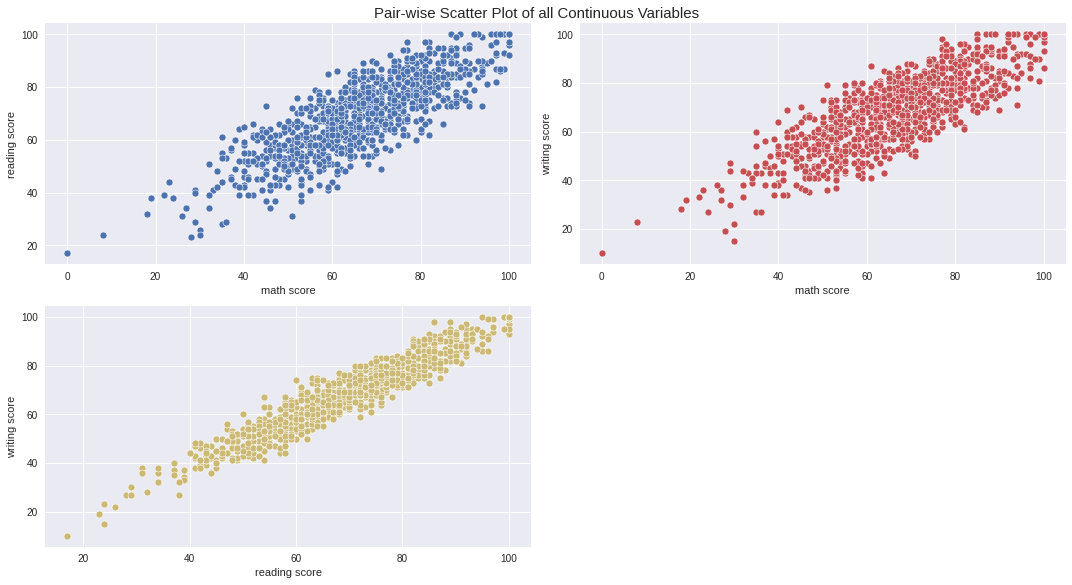

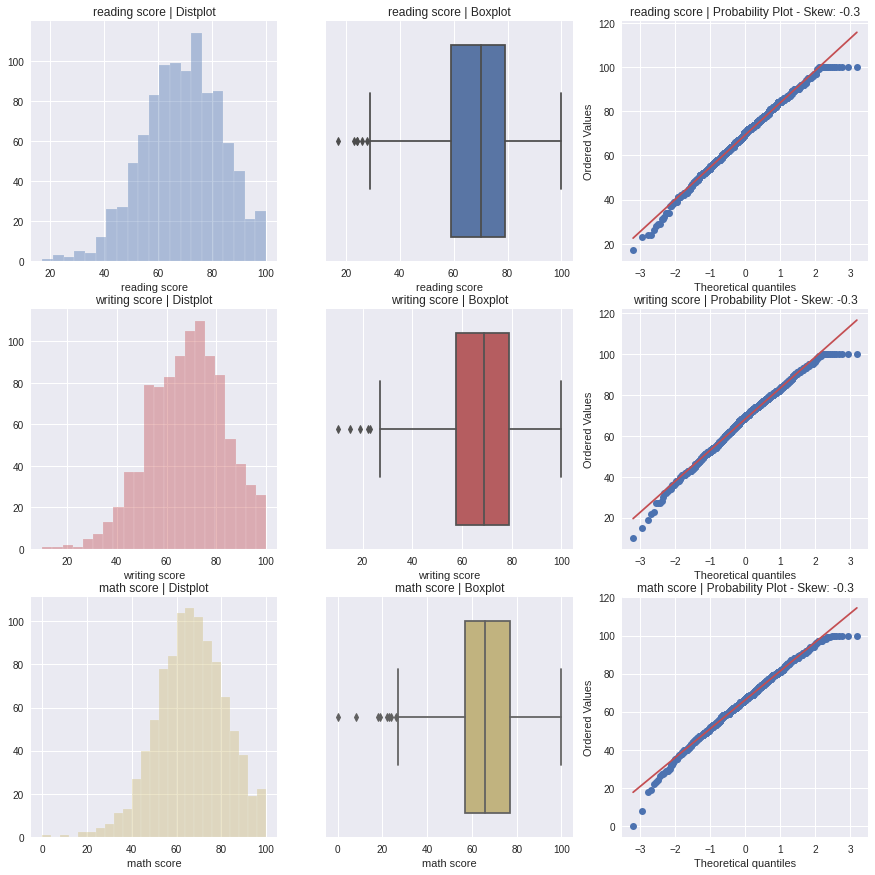

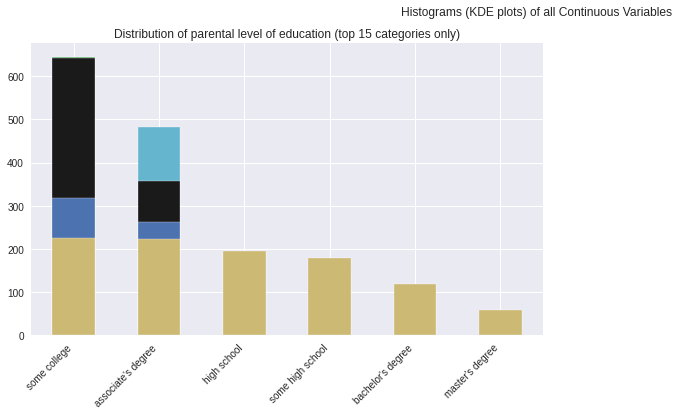

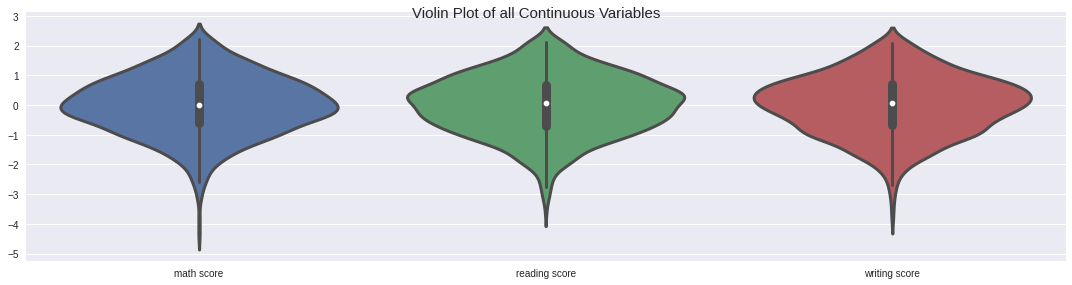

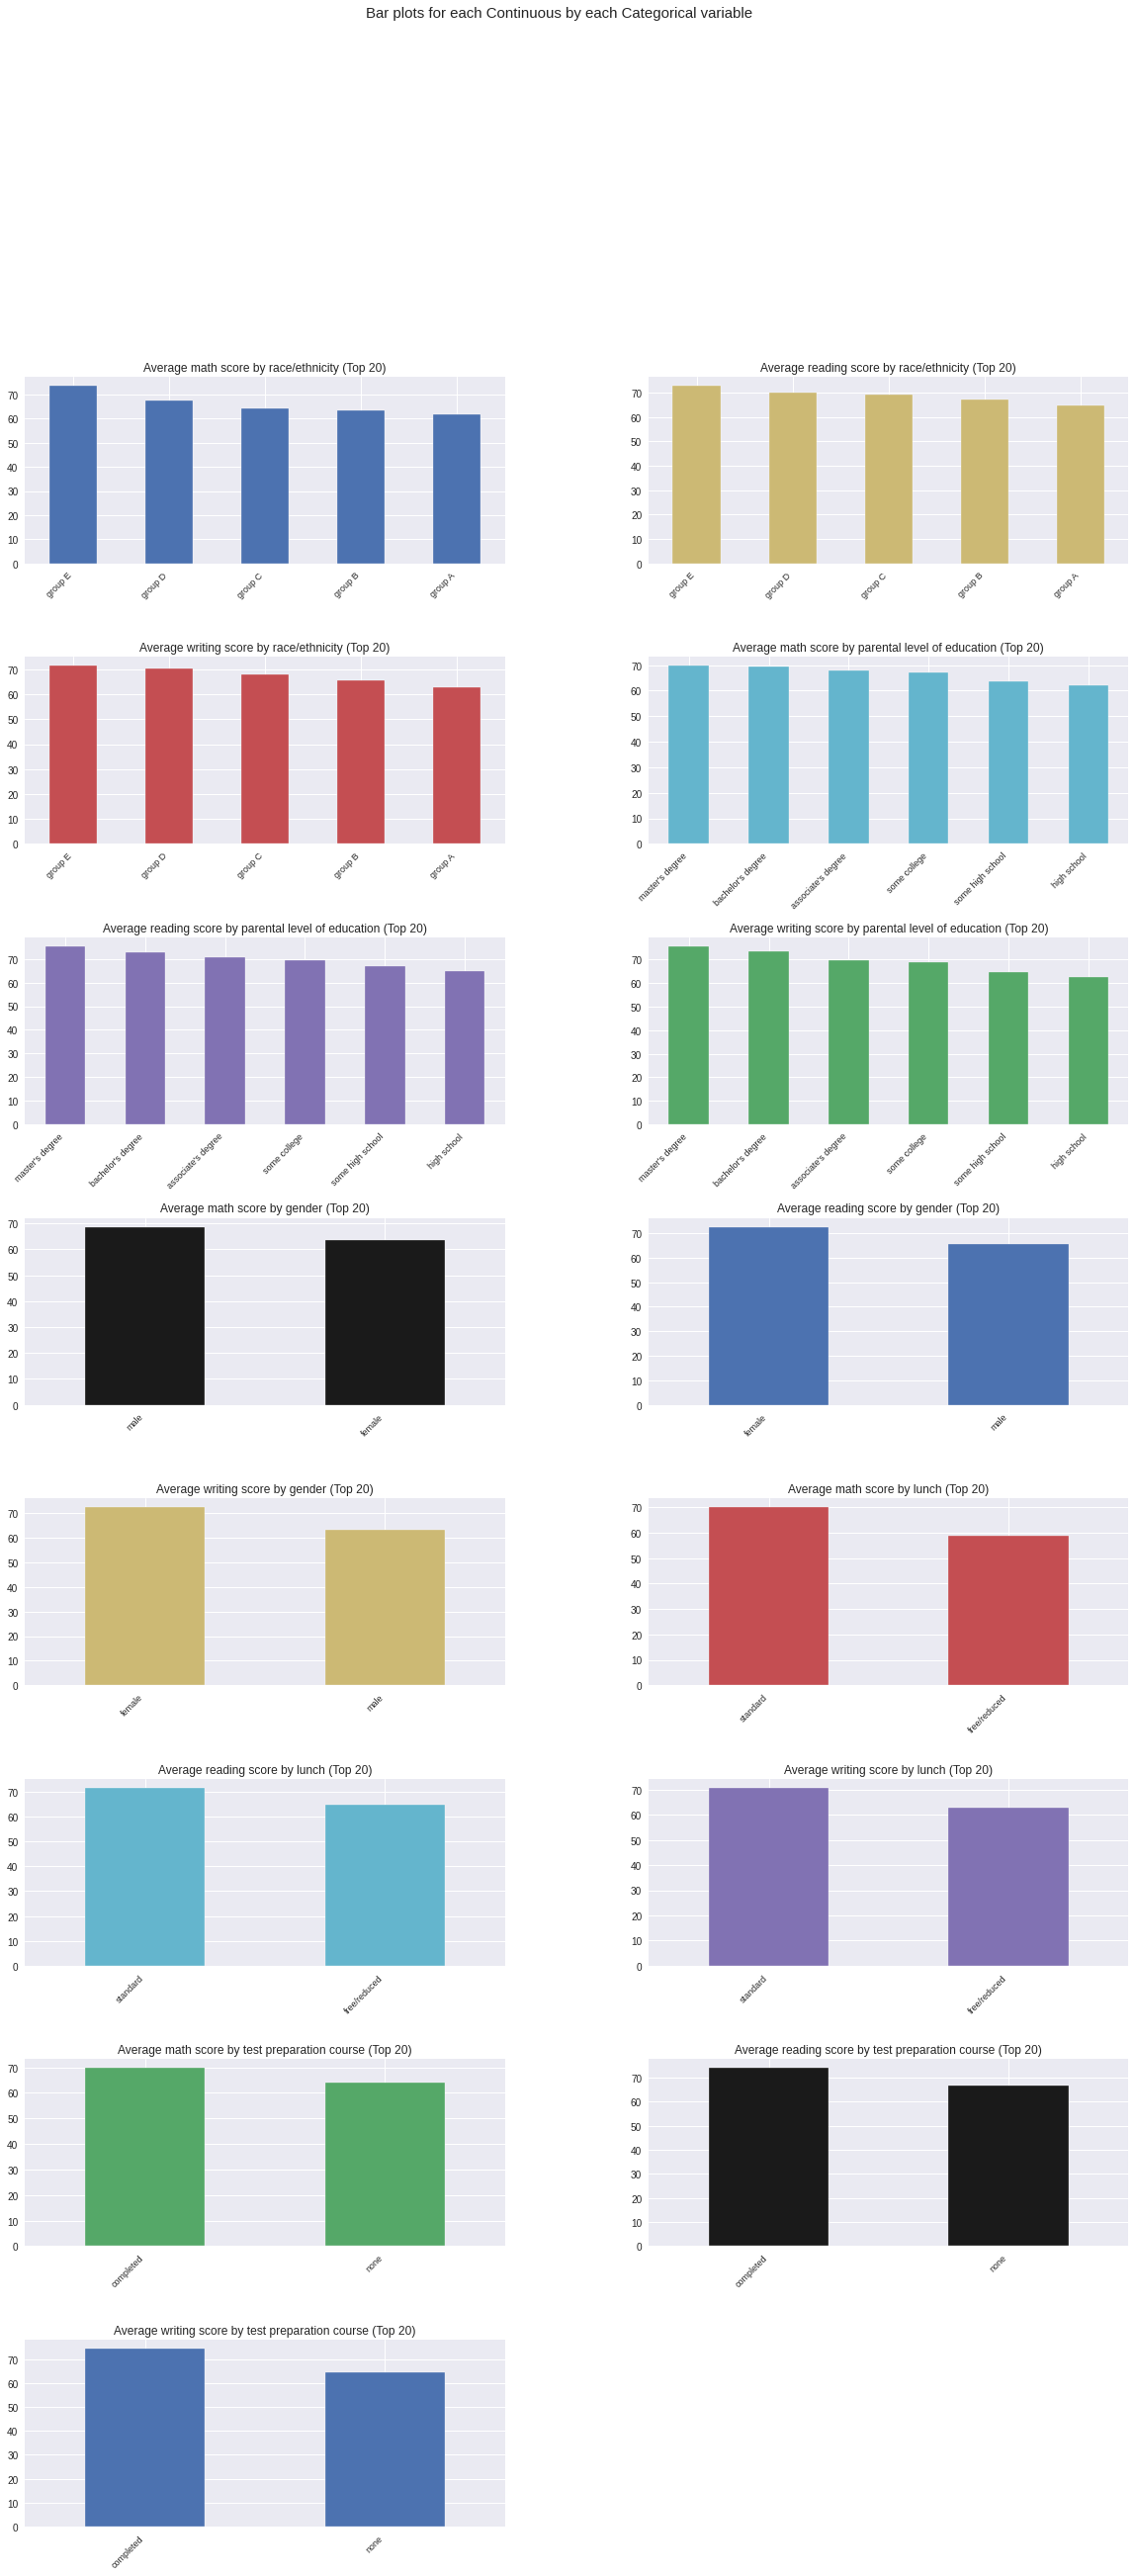

Time to run AutoViz (in seconds) = 6

 ###################### VISUALIZATION Completed ########################


In [ ]:
AV = AutoViz_Class()
df = AV.AutoViz(filename="", sep=',', dfte=data, header=0, verbose=1, lowess=False, 
                chart_format='svg', )

In [ ]:
!pip install pandas-profiling==2.11.0

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ***Data preprocessing***

In [3]:
data['avg']=(data['math score']+data['reading score']+data['writing score'])/3
data.drop(['math score','reading score','writing score'],axis=1,inplace=True)
data

gender race/ethnicity  ... test preparation course        avg
0    female        group B  ...                    none  72.666667
1    female        group C  ...               completed  82.333333
2    female        group B  ...                    none  92.666667
3      male        group A  ...                    none  49.333333
4      male        group C  ...                    none  76.333333
..      ...            ...  ...                     ...        ...
995  female        group E  ...               completed  94.000000
996    male        group C  ...                    none  57.333333
997  female        group C  ...               completed  65.000000
998  female        group D  ...               completed  74.333333
999  female        group D  ...                    none  83.000000

[1000 rows x 6 columns]

In [4]:
from sklearn.preprocessing import OrdinalEncoder
data['race/ethnicity']=OrdinalEncoder().fit_transform(data[['race/ethnicity']])
data=pd.get_dummies(data,columns=['gender','parental level of education','lunch','test preparation course'])

Shape of your Data Set loaded: (1000, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  12
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Regression VISUALIZATION Started #####################
Data Set Shape: 1000 rows, 14 cols
Data Set columns info:
* race/ethnicity: 0 nulls, 5 unique vals, most common: {2.0: 319, 3.0: 262}
* gender_female: 0 n

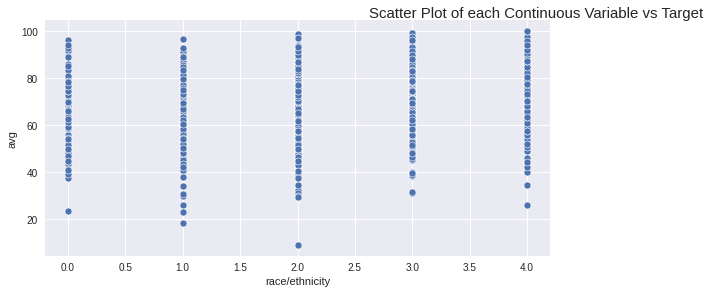

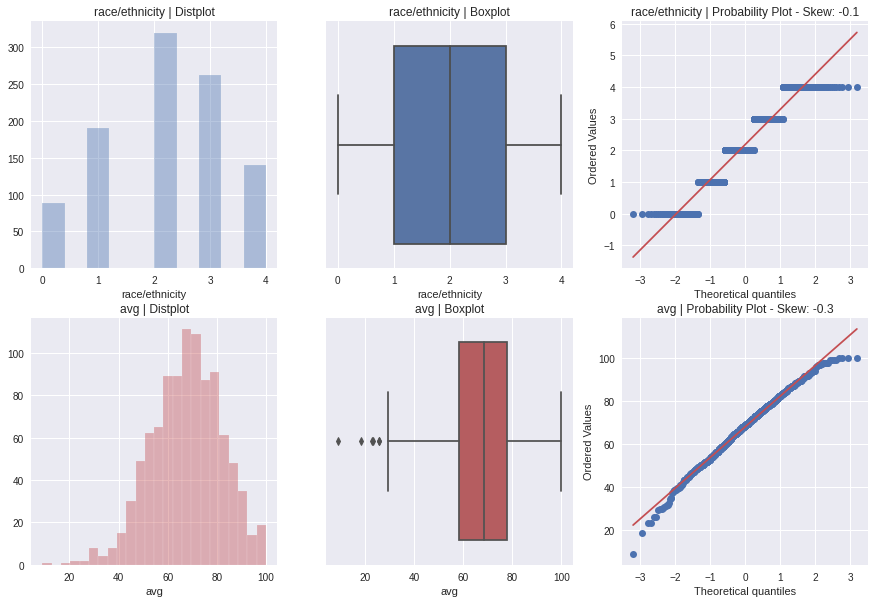

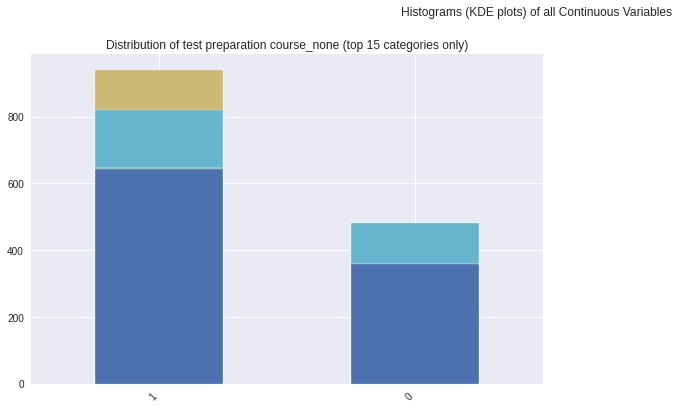

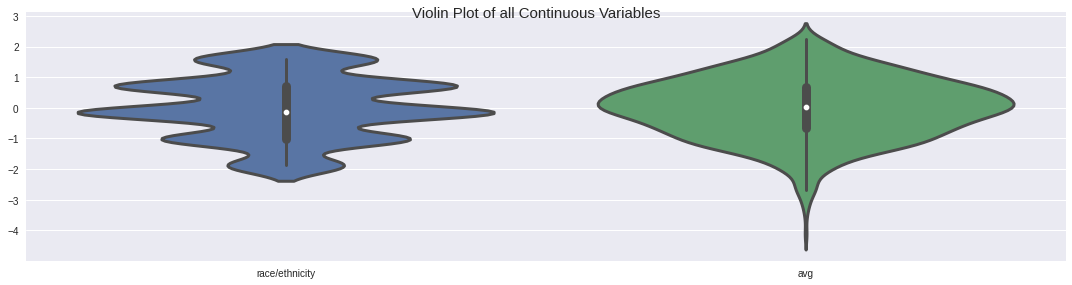

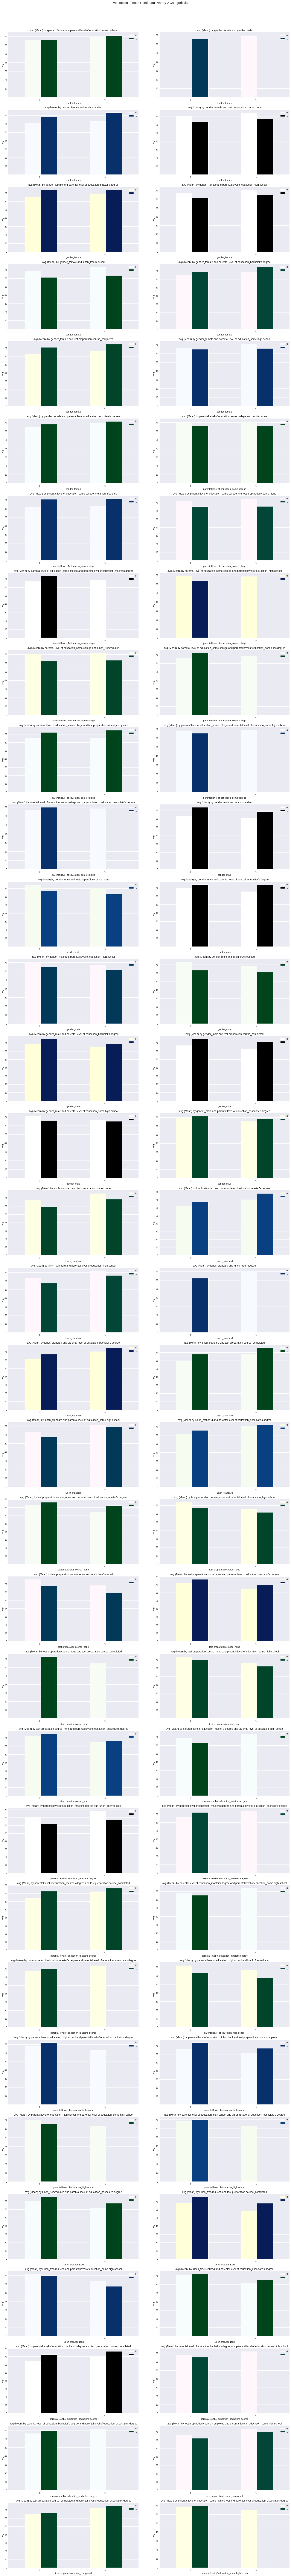

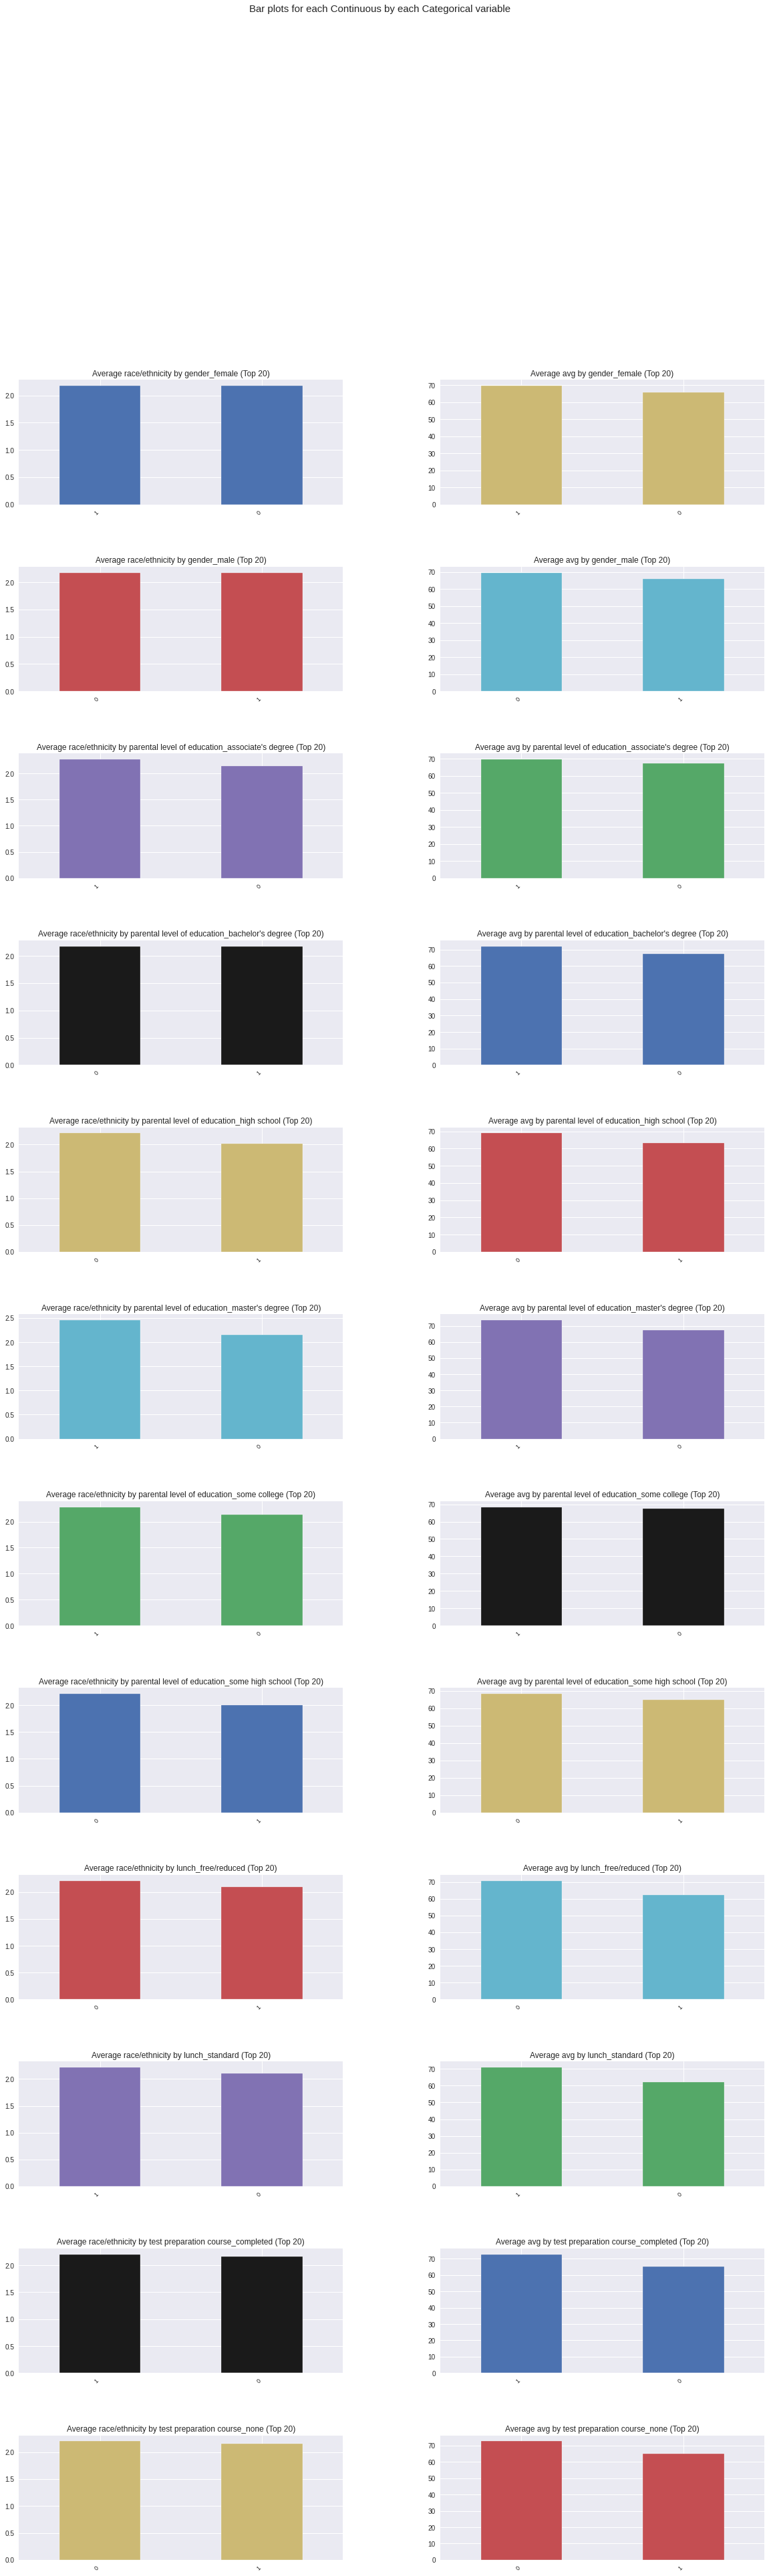

All Plots done
Time to run AutoViz (in seconds) = 20

 ###################### VISUALIZATION Completed ########################


In [ ]:
AV = AutoViz_Class()
df = AV.AutoViz(filename="", sep=',', depVar='avg', dfte=data, header=0, verbose=1, lowess=False, 
                chart_format='svg', )

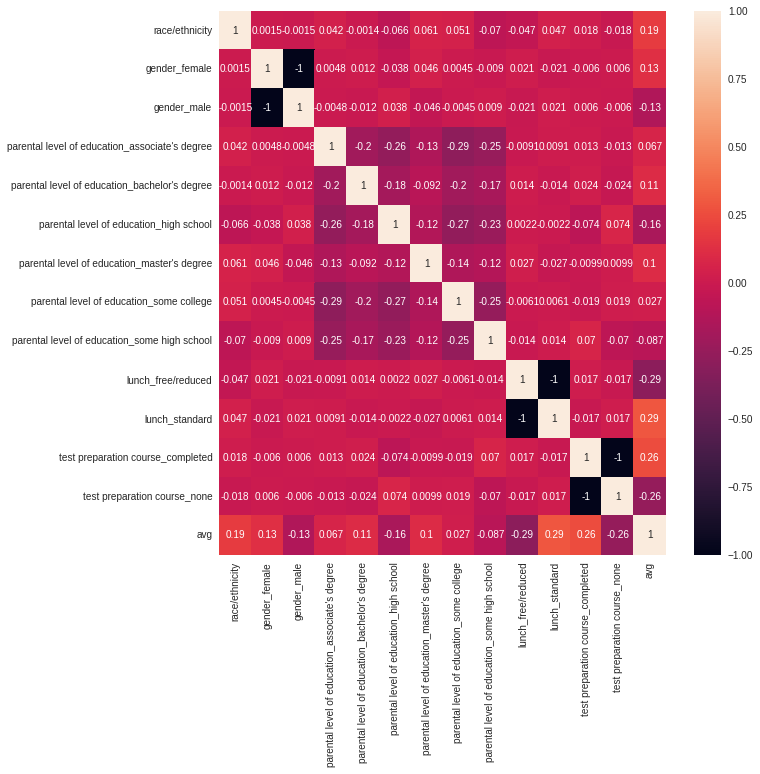

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

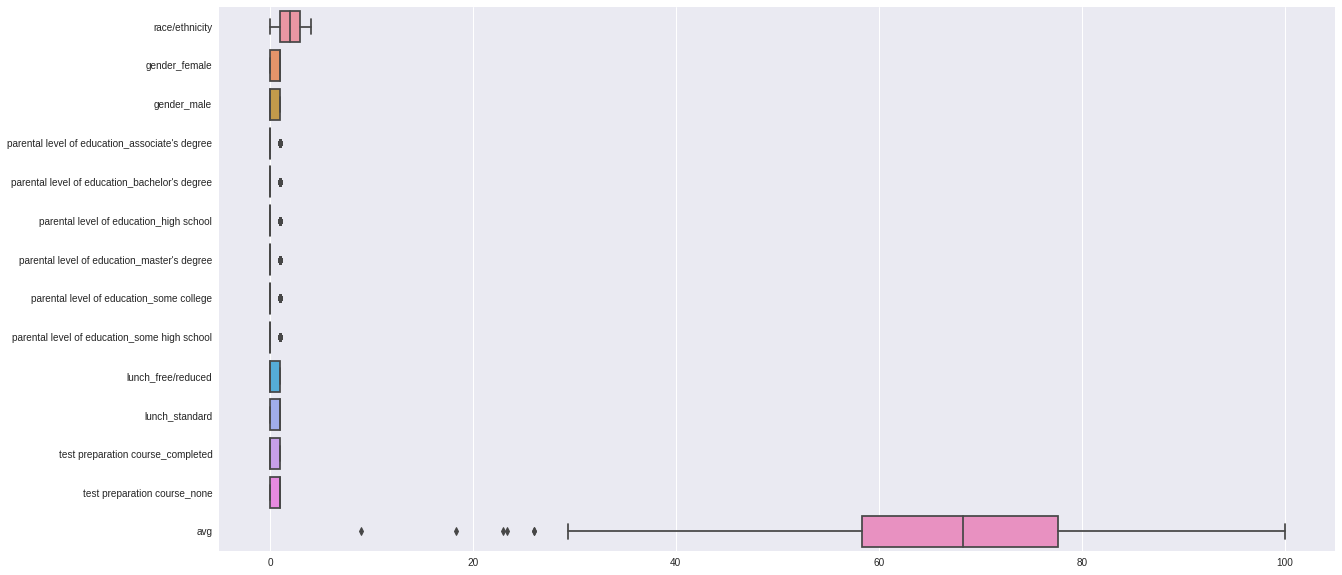

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,orient='h')

In [ ]:
from sklearn.model_selection import train_test_split
y=data['avg']
x=data.drop(['avg'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
!pip install -U xgboost

In [ ]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

[09:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.10982736153500328

In [ ]:
r2_score(y_train,xg.predict(x_train))

0.30998125537971866

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 24 kB/s 


In [ ]:
from catboost import CatBoostRegressor
xg=CatBoostRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

Learning rate set to 0.039525
0:	learn: 14.0299345	total: 46.5ms	remaining: 46.4s
1:	learn: 13.9195514	total: 47.2ms	remaining: 23.6s
2:	learn: 13.8118634	total: 47.8ms	remaining: 15.9s
3:	learn: 13.7062437	total: 48.3ms	remaining: 12s
4:	learn: 13.6145668	total: 48.9ms	remaining: 9.73s
5:	learn: 13.5212202	total: 49.4ms	remaining: 8.19s
6:	learn: 13.4416070	total: 49.8ms	remaining: 7.07s
7:	learn: 13.3671269	total: 50.4ms	remaining: 6.24s
8:	learn: 13.2953854	total: 50.9ms	remaining: 5.6s
9:	learn: 13.2190289	total: 51.7ms	remaining: 5.12s
10:	learn: 13.1578559	total: 52.9ms	remaining: 4.75s
11:	learn: 13.1114547	total: 53.8ms	remaining: 4.43s
12:	learn: 13.0434787	total: 54.5ms	remaining: 4.14s
13:	learn: 12.9807920	total: 55.1ms	remaining: 3.88s
14:	learn: 12.9244401	total: 55.7ms	remaining: 3.66s
15:	learn: 12.8754992	total: 56.3ms	remaining: 3.46s
16:	learn: 12.8252389	total: 56.8ms	remaining: 3.29s
17:	learn: 12.7727267	total: 57.4ms	remaining: 3.13s
18:	learn: 12.7411948	total: 

-0.04586314251615864

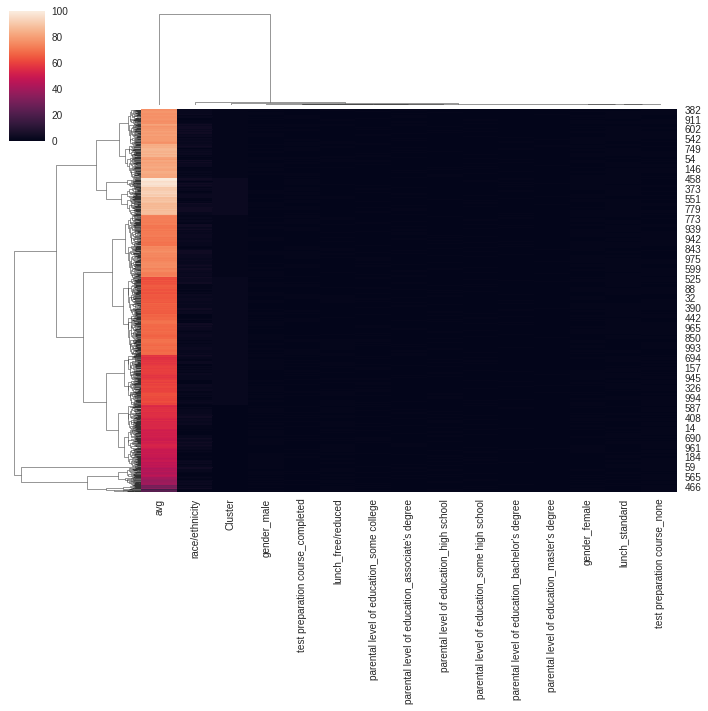

In [69]:
sns.clustermap(data)

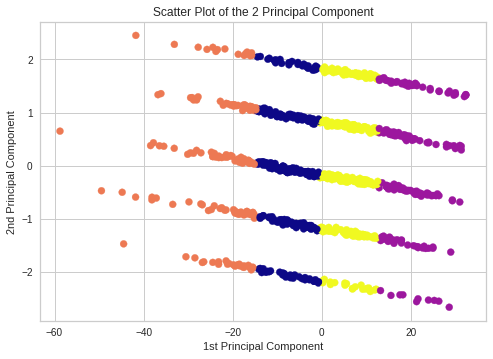

In [78]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components = 4)
X_pca = pca.fit_transform(data)
hc = KMeans(n_clusters = 4)
X=data
y_kmeans = hc.fit_predict(X)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_kmeans, cmap = 'plasma')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 2 Principal Component')
plt.show()

In [ ]:
!pip install -U yellowbrick

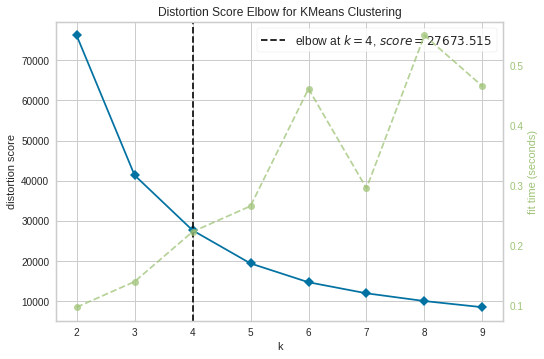

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

X=data
# Instantiate the clustering model and visualizer
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

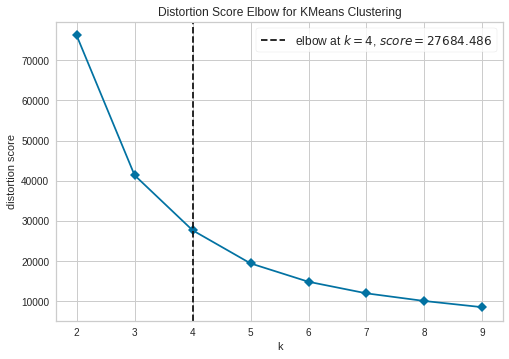

In [33]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(init = 'k-means++',)
visualizer = KElbowVisualizer(
    model, k=(2,10),  timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

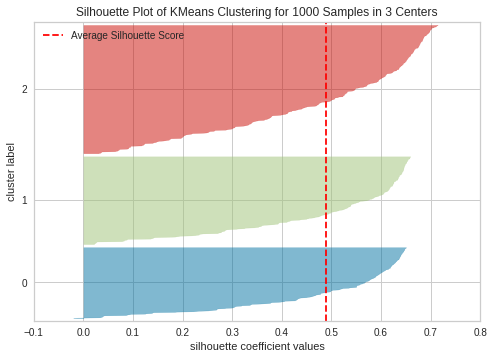

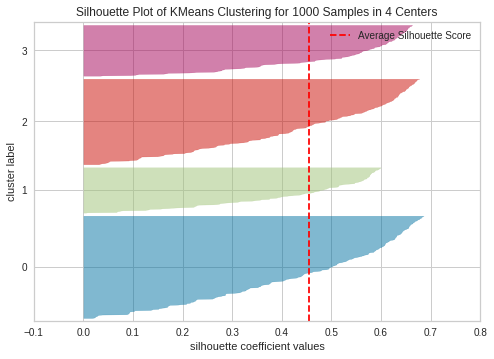

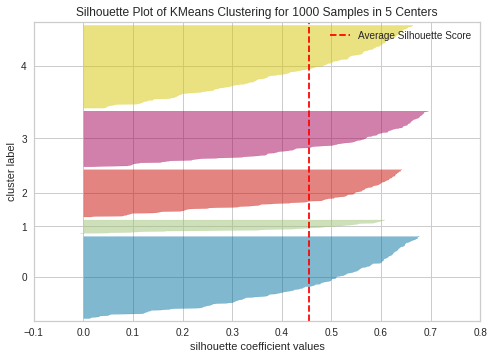

In [48]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer


# Specify the features to use for clustering

# Instantiate the clustering model and visualizer
for i in range (3,6):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X)        # Fit the data to the visualizer
  visualizer.poof()        # Finalize an

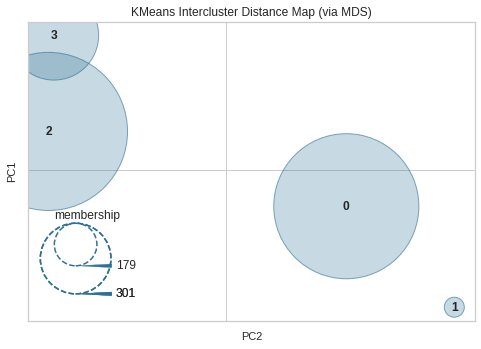

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters

# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
hc = KMeans(n_clusters = 4)
X=data
y_kmeans = hc.fit_predict(X)

In [76]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 46.1 MB/s 
     |████████████████████████████████| 1.3 MB 56.5 MB/s 
     |████████████████████████████████| 113 kB 58.0 MB/s 
     |████████████████████████████████| 1.7 MB 53.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 35.6 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 167 kB 57.3 MB/s 
     |████████████████████████████████| 261 kB 47.6 MB/s 
     |████████████████████████████████| 3.1 MB 35.8 MB/s 
     |████████████████████████████████| 675 kB 44.5 MB/s 
     |████████████████████████████████| 596 kB 47.6 MB/s 
     |███████████████████

In [5]:
from pycaret.clustering import *
clu1 = setup(data, session_id=123, log_experiment=True, log_plots = True, 
             experiment_name='health1')

Description           Value
0                               session_id             123
1                            Original Data      (1000, 14)
2                           Missing Values           False
3                         Numeric Features              14
4                     Categorical Features               0
5                         Ordinal Features           False
6                High Cardinality Features           False
7                  High Cardinality Method            None
8                         Transformed Data      (1000, 14)
9                                 CPU Jobs              -1
10                                 Use GPU           False
11                          Log Experiment            True
12                         Experiment Name         health1
13                                     USI            575a
14                         Imputation Type          simple
15          Iterative Imputation Iteration            None
16                         Numeric Imputer            mean
17      Iterative Imputation Numeric Model            None
18                     Categorical Imputer            mode
19  Iterative Imputation Categorical Model            None
20           Unknown Categoricals Handling  least_frequent
21                               Normalize           False
22                        Normalize Method            None
23                          Transformation           False
24                   Transformation Method            None
25                                     PCA           False
26                              PCA Method            None
27                          PCA Components            None
28                     Ignore Low Variance           False
29                     Combine Rare Levels           False
30                    Rare Level Threshold            None
31                         Numeric Binning           False
32                         Remove Outliers           False
33                      Outliers Threshold            None
34                Remove Multicollinearity           False
35             Multicollinearity Threshold            None
36             Remove Perfect Collinearity           False
37                              Clustering           False
38                    Clustering Iteration            None
39                     Polynomial Features           False
40                       Polynomial Degree            None
41                    Trignometry Features           False
42                    Polynomial Threshold            None
43                          Group Features           False
44                       Feature Selection           False
45                Feature Selection Method         classic
46            Features Selection Threshold            None
47                     Feature Interaction           False
48                           Feature Ratio           False
49                   Interaction Threshold            None

In [7]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [41]:
kmeans = create_model('kmeans', num_clusters = 4)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.4558          2147.0065  ...           0             0

[1 rows x 6 columns]

In [42]:

kmodes = create_model('kmodes', num_clusters = 4)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0     -0.0933            22.0484  ...           0             0

[1 rows x 6 columns]

In [43]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

race/ethnicity        avg  ...  test preparation course_none    Cluster
0             1.0  72.666667  ...                             1  Cluster 0
1             2.0  82.333333  ...                             0  Cluster 2
2             1.0  92.666667  ...                             1  Cluster 2
3             0.0  49.333333  ...                             1  Cluster 1
4             2.0  76.333333  ...                             1  Cluster 0

[5 rows x 15 columns]

In [44]:
plot_model(kmeans)


In [45]:
plot_model(kmeans, plot = 'tsne')

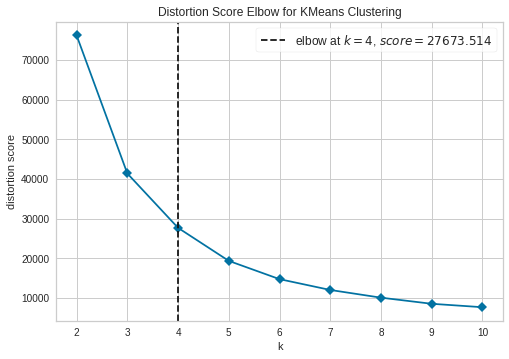

In [46]:
plot_model(kmeans, plot = 'elbow')

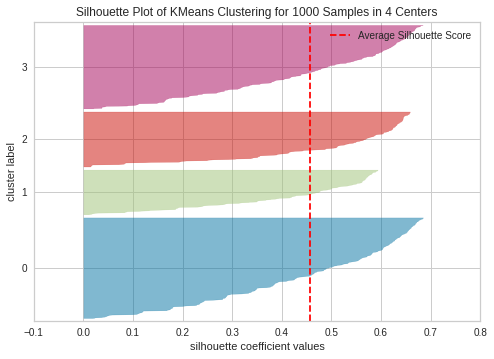

In [47]:
plot_model(kmeans, plot = 'silhouette')